
# Actividad 1: Preprocesamiento de Datos

**Objetivo:** La finalidad de la presente actividad es aplicar los conocimientos teóricos adquiridos durante la unidad 2 preprocesamiento de datos. En este contexto, se llevarán a cabo diversas acciones bajo los siguientes subtemas:

1. Limpieza de Datos
2. Transformación de Datos
3. Selección de Características
4. Reducción de Datos


Para la ejecución de estas etapas, se empleará un conjunto de datos ampliamente reconocido en el ámbito de la minería de datos, denominado "Titanic - Machine Learning from Disaster". Este conjunto de datos se encuentra disponible en el repositorio Kaggle, accesible mediante el siguiente enlace: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data?select=test.csv). Adicionalmente, se proporciona un diccionario del conjunto de datos y una explicación detallada en el siguiente enlace: [Diccionario y Explicación del Conjunto de Datos](https://www.kaggle.com/competitions/titanic/data).

Se insta a los participantes a seguir rigurosamente los subtemas mencionados y a utilizar las fuentes de información proporcionadas para llevar a cabo el proceso de preprocesamiento de datos de manera efectiva y fundamentada. La aplicación práctica de los conceptos teóricos contribuirá al desarrollo de habilidades cruciales en el ámbito de la mineria de datos.



# 0. Cargar el Conjunto de Datos:
1. Descargar el conjunto de datos denominado **train.csv** desde la competición Titanic - Machine Learning from Disaster.

2. Subir el archivo train.csv a Google Colab mediante la función de arrastre y suelta, o utilizando la opción de carga de archivos.

3. Importar el archivo utilizando la biblioteca Pandas. **Se recomienda revisar y, si es necesario, modificar la ruta del archivo en la siguiente línea de código para asegurar la correcta carga de datos.**

In [2]:
# Importar pandas
import pandas as pd

# Modificar la ruta del archivo si es necesario
ruta_archivo = "/content/train.csv"
datos_titanic = pd.read_csv(ruta_archivo)


# 1. Limpieza de datos:

Inicialmente, es imperativo verificar la importación exitosa del conjunto de datos. A tal efecto, se procederá a visualizar el dataframe denominado datos_titanic. Este paso garantizará la correcta carga de datos y permitirá continuar con las etapas subsiguientes de la actividad.

La inspección visual de las primeras filas (.head) del conjunto de datos facilitará la identificación de posibles problemas de importación y sienta las bases para la aplicación de técnicas de limpieza de datos.

In [3]:
datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El data set contiene el siguiente diccionario:

| Variable  | Definición                                | Clave                                      |
|------------|--------------------------------------------|--------------------------------------------|
| survival   | Supervivencia                              | 0 = No, 1 = Sí                            |
| pclass     | Clase del billete                          | 1 = 1ra, 2 = 2da, 3 = 3ra                 |
| sex        | Género                                     |                                            |
| Age        | Edad en años                               |                                            |
| sibsp      | # de hermanos/cónyuges a bordo del Titanic |                                            |
| parch      | # de padres/hijos a bordo del Titanic      |                                            |
| ticket     | Número de boleto                           |                                            |
| fare       | Tarifa del pasajero                        |                                            |
| cabin      | Número de cabina                           |                                            |
| embarked   | Puerto de embarque                         | C = Cherbourg, Q = Queenstown, S = Southampton |

Además:

- Variable Notes
pclass: Un indicador de la situación socioeconómica (SES)
  * 1st = Alta
  * 2nd = Media
  * 3rd = Baja

- age: La edad es fraccionaria si es inferior a 1. Si la edad es estimada, es en forma de xx.5

- sibsp: el conjunto de datos define las relaciones familiares de esta manera...
  * Sibling = hermano, hermana, hermanastro, hermanastra
  * Spouse = esposo, esposa (amantes y prometidos fueron ignorados)

- parch: El conjunto de datos define así las relaciones familiares...
  * Parent = madre, padre
  * Child = hija, hijo, hijastra, hijastro
  * Some children travelled only with a nanny, therefore parch=0 for them.

Una forma general de ver el tipo de información que almacena nuestro dataframe es mediante .info()

In [4]:
datos_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


La función describe en Pandas es una herramienta útil para obtener estadísticas descriptivas de un DataFrame, como la media, la desviación estándar, los valores mínimos y máximos, los cuartiles, entre otros. Se utiliza comúnmente para realizar un análisis inicial y obtener una comprensión rápida de la distribución de los datos en un conjunto de datos.


Nota puedes transponer el dataframe descriptivo utilizando .T, esto ayudará a presentar los descriptivos de una manera más optima

In [5]:
datos_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Esto proporcionará estadísticas descriptivas para todas las columnas numéricas del DataFrame.

Sin embargo, el parámetro include permite especificar el tipo de datos que se incluirá en el resumen estadístico. Algunos de los valores posibles para include son:

* 'all': Incluye todas las columnas, independientemente de su tipo de datos.

* 'number': Incluye solo columnas numéricas.
* 'object': Incluye solo columnas de tipo objeto (cadenas u otros tipos de datos no numéricos).
* 'category': Incluye solo columnas de tipo categoría.
Por ejemplo, para obtener estadísticas descriptivas solo para columnas de tipo objeto y número, se puede utilizar:

In [6]:
datos_titanic.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [7]:
datos_titanic.describe(include=['float64','int64']).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Valores faltantes:

Para detectar valores nulos en un DataFrame de Pandas, se puede utilizar el método isnull() junto con el método sum(). Este enfoque proporciona el recuento de valores nulos en cada columna.

In [8]:
datos_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Los resultados indican que:

* PassengerId: No tiene valores nulos. Todos los registros tienen una identificación de pasajero.

* Survived: No tiene valores nulos. Todos los registros tienen información sobre la supervivencia.

* Pclass: No tiene valores nulos. Todos los registros tienen información sobre la clase del billete.

* Name: No tiene valores nulos. Todos los registros tienen información sobre el nombre del pasajero.

* Sex: No tiene valores nulos. Todos los registros tienen información sobre el género del pasajero.

* Age: Tiene 177 valores nulos. Hay 177 registros sin información sobre la edad del pasajero.

* SibSp: No tiene valores nulos. Todos los registros tienen información sobre el número de hermanos/cónyuges a bordo.

* Parch: No tiene valores nulos. Todos los registros tienen información sobre el número de padres/hijos a bordo.

* Ticket: No tiene valores nulos. Todos los registros tienen información sobre el número de boleto.

* Fare: No tiene valores nulos. Todos los registros tienen información sobre la tarifa del pasajero.

* Cabin: Tiene 687 valores nulos. La mayoría de los registros (687) no tienen información sobre el número de cabina.

* Embarked: Tiene 2 valores nulos. Hay 2 registros sin información sobre el puerto de embarque.

Esta interpretación te brinda una visión general de la integridad de los datos en cada columna. Puedemos considerar estrategias como imputación de valores para las edades faltantes o la eliminación de la columna "Cabin" si la falta de datos es significativa.

### Eliminación de una columna:

Asegurarnos que más del 20% de los registros en Cabin son faltantes

In [9]:
# Calcula el porcentaje de valores nulos en la columna "Cabin"
porcentaje_nulos_cabin = (datos_titanic['Cabin'].isnull().sum() / len(datos_titanic)) * 100

# Compara si el porcentaje es mayor del 20%
if porcentaje_nulos_cabin > 20:
    print(f'Más del 20% de los registros en la columna "Cabin" son faltantes ({porcentaje_nulos_cabin:.2f}%)')
else:
    print(f'El porcentaje de valores nulos en la columna "Cabin" es {porcentaje_nulos_cabin:.2f}%, no supera el 20%')

Más del 20% de los registros en la columna "Cabin" son faltantes (77.10%)


Eliminar la columna completa:

Si decides eliminar la columna completa "Cabin" debido a que más del 20% de sus registros son valores nulos, puedes utilizar el método drop de Pandas. Aquí tienes un ejemplo de cómo hacerlo:


In [10]:
datos_titanic = datos_titanic.drop(columns = ["Cabin"])
# Alternativa
# datos_titanic.drop('Cabin', axis=1, inplace=True)

datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Imputación o eliminación de registros (filas):

* La imputación es preferible cuando la cantidad de datos faltantes es baja o cuando la pérdida de información es crítica.

* La eliminación puede ser apropiada si la cantidad de datos faltantes es considerable y no se pueden aplicar métodos de imputación de manera efectiva.

En general, es crucial evaluar las implicaciones de la imputación o eliminación en el contexto específico del análisis y considerar el impacto en la calidad y validez de los resultados. La elección entre estas estrategias debe basarse en un entendimiento profundo del conjunto de datos y los objetivos del análisis.

#### Elimiación de registros

In [11]:
# Mostrar el dataframe actual
datos_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Eliminaremos los unicos dos registros nulos de la columna Embarked utilizando el método dropna()

In [12]:
# Elimina las filas donde la columna "Embarked" sea nula
datos_titanic = datos_titanic.dropna(subset=['Embarked'])

# Muestra el DataFrame resultante
datos_titanic

# Nota que la catidad de fila se ha reducido de 891 a 889

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Imputación de registros

Para realizar la imputación de los valores nulos en la columna "Age" del DataFrame datos_titanic, puedes utilizar diferentes estrategias de imputación, como reemplazar los valores nulos con la media, la mediana o utilizando técnicas más avanzadas como la imputación basada en modelos predictivos.

Mostremos primero los estadisticos descriptivos de Age

In [13]:
# Calcula el porcentaje de valores nulos en la columna "Age"
porcentaje_nulos_cabin = (datos_titanic['Age'].isnull().sum() / len(datos_titanic)) * 100

# Compara si el porcentaje es mayor del 20%
if porcentaje_nulos_cabin > 20:
    print(f'Más del 20% de los registros en la columna "Age" son faltantes ({porcentaje_nulos_cabin:.2f}%)')
else:
    print(f'El porcentaje de valores nulos en la columna "Age" es {porcentaje_nulos_cabin:.2f}%, no supera el 20%')

El porcentaje de valores nulos en la columna "Age" es 19.91%, no supera el 20%


In [14]:
datos_titanic["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

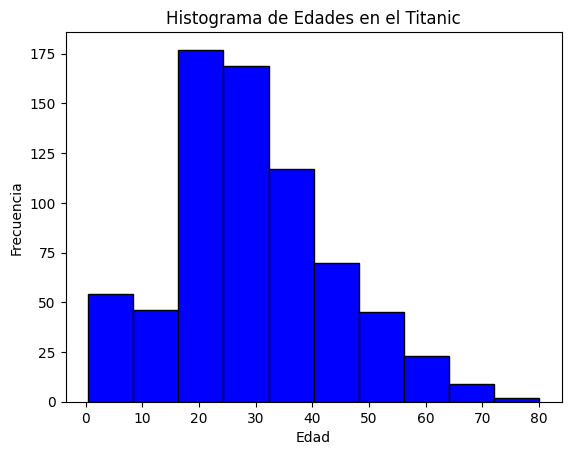

In [15]:
import matplotlib.pyplot as plt
# Crear un histograma de la columna "Age"
plt.hist(datos_titanic['Age'], color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

visualmente el histograma no se percibe un sesgo evidente en la distribución de la columna "Age" y la distribución parece aproximadamente simétrica, entonces utilizar la media como valor para imputar los datos nulos podría ser una elección razonable, para ello:

In [16]:
# Calcula la media de la columna "Age"
media_edad = datos_titanic['Age'].mean()

# Imputa los valores nulos en "Age" con la media
datos_titanic['Age'].fillna(media_edad, inplace=True)

datos_titanic

<ipython-input-16-14ce6281e794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_titanic['Age'].fillna(media_edad, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Para verificar la completitud del conjunto de datos procesados y mostrar el recuento de los valores nulos en todo el DataFrame, puedes utilizar el siguiente código:

In [17]:
# Verificar y mostrar el recuento de valores nulos en todo el DataFrame
print(datos_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 2. Transformación de datos:

Las transformaciones de datos, como la normalización, estandarización y transformación logarítmica, son técnicas comúnmente aplicadas a variables cuantitativas para abordar diferentes aspectos de la distribución de datos. Estas transformaciones permiten ajustar, escalar o modificar la forma de las distribuciones, contribuyendo así a mejorar la interpretación y el rendimiento de modelos analíticos.

Es crucial destacar que estas técnicas se aplican de manera efectiva y coherente solo a variables cuantitativas. Variables cuantitativas son aquellas que representan cantidades numéricas y se pueden medir o contar. En contraste, variables cualitativas o categóricas, que representan categorías o etiquetas, no son sujetas a estas transformaciones.

Primera seleccionamos los datos cuantitvos del dataframe previamente trabajado

In [18]:
datos_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [19]:
# Observamos los datos unicamente cuantitativos
datos_titanic.loc[:,["Age","Fare"]]


,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.642093,23.4500
889,26.000000,30.0000


## 1. Normalización:
Realizaremos la normalización de las columnas 'Age' y 'Fare' utilizando la fórmula de normalización min-max.

In [20]:
# Normalización de las columnas 'Age' y 'Fare'
datos_titanic['Age_Norm'] = (datos_titanic['Age'] - datos_titanic['Age'].min()) / (datos_titanic['Age'].max() - datos_titanic['Age'].min())
datos_titanic['Fare_Norm'] = (datos_titanic['Fare'] - datos_titanic['Fare'].min()) / (datos_titanic['Fare'].max() - datos_titanic['Fare'].min())
datos_titanic = datos_titanic.copy()

# Mostrar algunas estadísticas descriptivas después de la normalización
print(datos_titanic[['Age', 'Fare', 'Age_Norm', 'Fare_Norm']].describe())


              Age        Fare    Age_Norm   Fare_Norm
count  889.000000  889.000000  889.000000  889.000000
mean    29.642093   32.096681    0.367204    0.062649
std     12.968346   49.697504    0.162960    0.097003
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    7.895800    0.271174    0.015412
50%     29.642093   14.454200    0.367204    0.028213
75%     35.000000   31.000000    0.434531    0.060508
max     80.000000  512.329200    1.000000    1.000000


<ipython-input-20-5cf1ccb34189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_titanic['Age_Norm'] = (datos_titanic['Age'] - datos_titanic['Age'].min()) / (datos_titanic['Age'].max() - datos_titanic['Age'].min())
<ipython-input-20-5cf1ccb34189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_titanic['Fare_Norm'] = (datos_titanic['Fare'] - datos_titanic['Fare'].min()) / (datos_titanic['Fare'].max() - datos_titanic['Fare'].min())


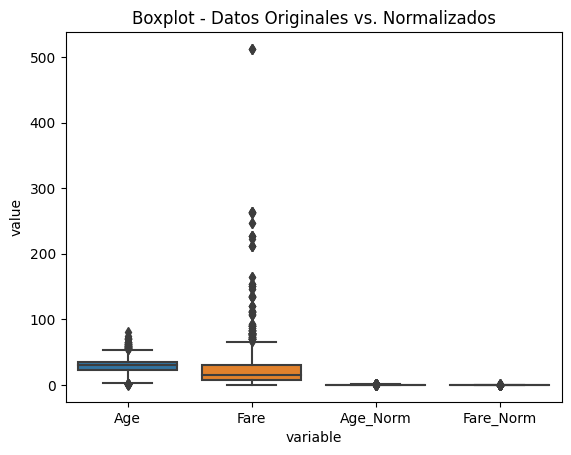

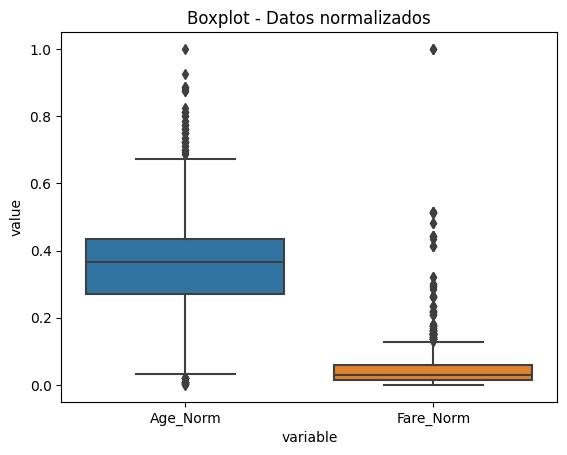

In [21]:
import seaborn as sns

# Boxplot para comparar 'Age' y 'Fare' y sus versiones normalizadas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age', 'Fare', 'Age_Norm', 'Fare_Norm']]))
plt.title('Boxplot - Datos Originales vs. Normalizados')
plt.show()


# Boxplot para comparar 'Age' y 'Fare' con sus versiones normalizadas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age_Norm', 'Fare_Norm']]))
plt.title('Boxplot - Datos normalizados')
plt.show()

**Conclusiones Normalización:**

* La normalización ajusta los datos al rango [0, 1].
* Facilita la comparación de variables con diferentes escalas.
* En el boxplot, los datos normalizados se encuentran en el rango [0, 1].

## 2. Estandarización:
Realizaremos la estandarización de las columnas 'Age' y 'Fare' utilizando la fórmula de estandarización (z-score).

In [22]:
from sklearn.preprocessing import StandardScaler

# Estandarización de las columnas 'Age' y 'Fare'
scaler = StandardScaler()
datos_titanic['Age_Est'] = scaler.fit_transform(datos_titanic[['Age']])
datos_titanic['Fare_Est'] = scaler.fit_transform(datos_titanic[['Fare']])
datos_titanic = datos_titanic.copy()

# Mostrar algunas estadísticas descriptivas después de la estandarización
print(datos_titanic[['Age', 'Fare', 'Age_Est', 'Fare_Est']].describe())


              Age        Fare       Age_Est      Fare_Est
count  889.000000  889.000000  8.890000e+02  8.890000e+02
mean    29.642093   32.096681 -2.957264e-16  1.398706e-16
std     12.968346   49.697504  1.000563e+00  1.000563e+00
min      0.420000    0.000000 -2.254608e+00 -6.462044e-01
25%     22.000000    7.895800 -5.896199e-01 -4.872378e-01
50%     29.642093   14.454200 -5.482138e-16 -3.551972e-01
75%     35.000000   31.000000  4.133853e-01 -2.207954e-02
max     80.000000  512.329200  3.885326e+00  9.668551e+00


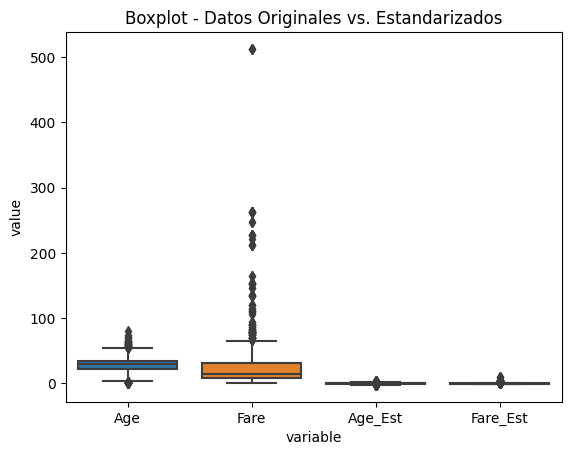

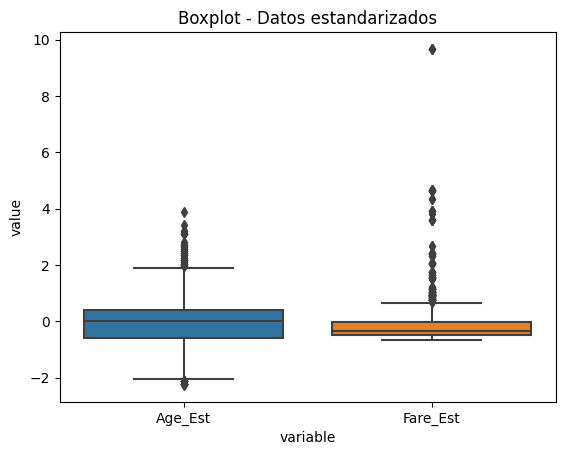

In [23]:
# Boxplot para comparar 'Age' y 'Fare' con sus versiones estandarizadas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age', 'Fare', 'Age_Est', 'Fare_Est']]))
plt.title('Boxplot - Datos Originales vs. Estandarizados')
plt.show()

# Boxplot para comparar 'Age' y 'Fare' en sus versiones estandarizadas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age_Est', 'Fare_Est']]))
plt.title('Boxplot - Datos estandarizados')
plt.show()

**Conclusiones Estandarización:**

* La estandarización ajusta los datos para que tengan una media de 0 y una desviación estándar de 1.
* Es útil cuando los datos tienen diferentes unidades o escalas.
* En el boxplot, los datos estandarizados tienen una media cercana a 0 y una dispersión similar.


## 3. Transformación Logarítmica:
Realizaremos la transformación logarítmica de las columnas para reducir la asimetría.

In [24]:
import numpy as np

datos_titanic['Fare_Log'] = np.log1p(datos_titanic['Fare'])
datos_titanic['Age_Log'] = np.log1p(datos_titanic["Age"])
datos_titanic = datos_titanic.copy()

# Mostrar algunas estadísticas descriptivas después de la transformación logarítmica
print(datos_titanic[['Age','Fare', 'Age_Log', 'Fare_Log']].describe())


              Age        Fare     Age_Log    Fare_Log
count  889.000000  889.000000  889.000000  889.000000
mean    29.642093   32.096681    3.289977    2.959024
std     12.968346   49.697504    0.615627    0.967750
min      0.420000    0.000000    0.350657    0.000000
25%     22.000000    7.895800    3.135494    2.185579
50%     29.642093   14.454200    3.422375    2.737881
75%     35.000000   31.000000    3.583519    3.465736
max     80.000000  512.329200    4.394449    6.240917


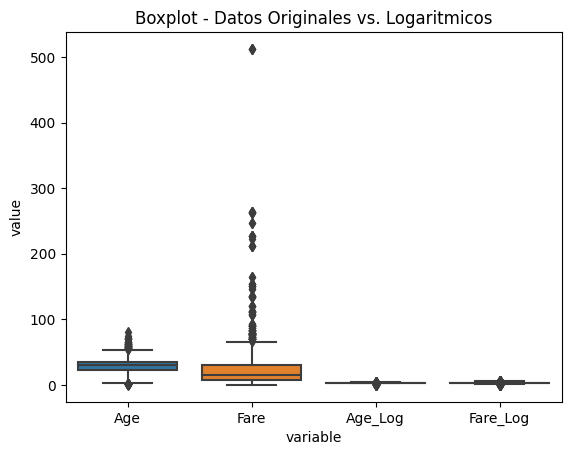

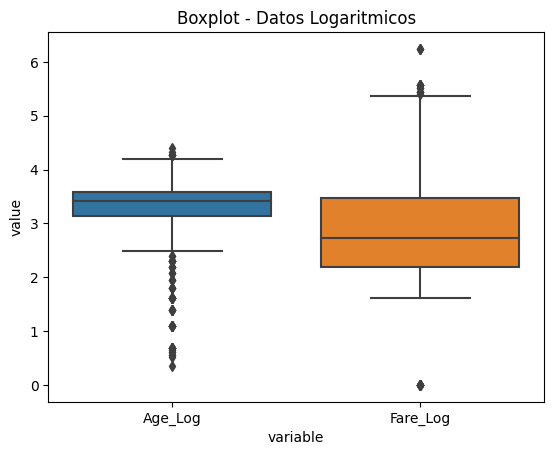

In [25]:
# Boxplot para comparar 'Age' y 'Fare' con sus versiones logaritmicas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age', 'Fare', 'Age_Log', 'Fare_Log']]))
plt.title('Boxplot - Datos Originales vs. Logaritmicos')
plt.show()

# Boxplot para comparar 'Age' y 'Fare' en sus versiones logaritmicas
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age_Log', 'Fare_Log']]))
plt.title('Boxplot - Datos Logaritmicos')
plt.show()

**Conclusiones Transformación Logarítmica:**

La transformación logarítmica es útil para reducir la asimetría en datos sesgados positivamente.
Puede ser beneficioso cuando los datos tienen valores extremadamente grandes.
En el boxplot, los datos transformados logarítmicamente muestran una distribución menos sesgada.

## 4. Comparaciones:

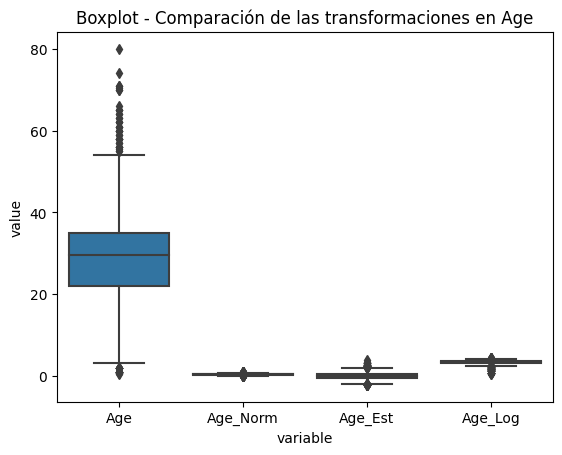

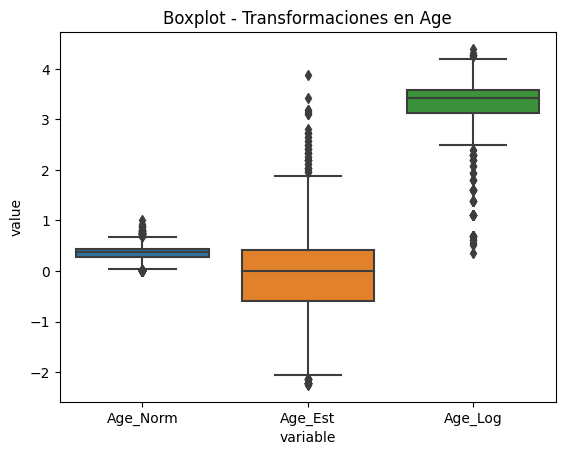

In [26]:
# Boxplot para comparar 'Age' en sus distintas versiones
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age','Age_Norm','Age_Est','Age_Log',]]))
plt.title('Boxplot - Comparación de las transformaciones en Age')
plt.show()

sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Age_Norm','Age_Est','Age_Log',]]))
plt.title('Boxplot - Transformaciones en Age')
plt.show()

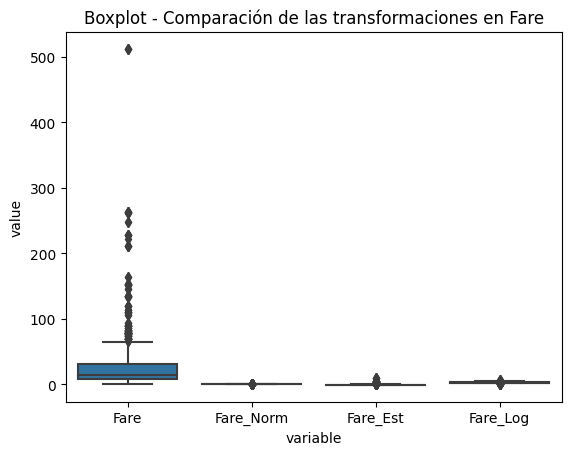

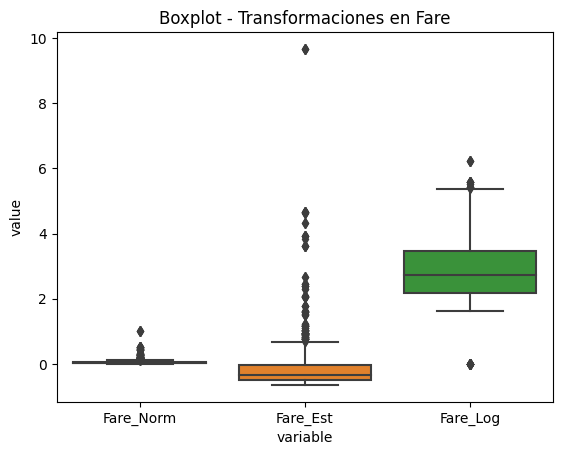

In [27]:
# Boxplot para comparar 'Fare' en sus distintas versiones
sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Fare','Fare_Norm','Fare_Est','Fare_Log',]]))
plt.title('Boxplot - Comparación de las transformaciones en Fare')
plt.show()

sns.boxplot(x='variable', y='value', data=pd.melt(datos_titanic[['Fare_Norm','Fare_Est','Fare_Log',]]))
plt.title('Boxplot - Transformaciones en Fare')
plt.show()

## 5. Binning o discretización:

Discreticemos los valores de:

* Columna Sex:
  * male=0
  * female=0

* Columna Age:
  * Age >= 18 -> "Mayor"
  * Age < 18 -> "Menor"


**Enfoque factorize:** En el método pd.factorize, el valor 0 representa la etiqueta numérica asignada a la primera ocurrencia única en la serie de datos. En otras palabras, cuando usas pd.factorize en una columna categórica, asigna números enteros de forma secuencial a cada categoría única encontrada en esa columna. La primera categoría única que se encuentra recibe la etiqueta 0, la segunda recibe la etiqueta 1, y así sucesivamente.

**Enfoque manual:** Se crea un diccionario con los valores deseados a discretizar, y posteriormente se mapea la solución al dataframe con .map



In [28]:
# Enfoque 1: Utilizar pd.factorize
datos_titanic['Sex_Dis'] = pd.factorize(datos_titanic['Sex'])[0]

# Enfoque 2: Mapeo manual
# sexo_mapping = {'male': 0, 'female': 1}
# datos_titanic['Sex_Dis'] = datos_titanic['Sex'].map(sexo_mapping)


# Crear la columna "Age_Category" basándonos en la condición
datos_titanic['Age_Category'] = ['mayor' if age >= 18 else 'menor' for age in datos_titanic['Age']]
datos_titanic['Age_Dis'] = [1 if age >= 18 else 0 for age in datos_titanic['Age']]


datos_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Norm,Fare_Norm,Age_Est,Fare_Est,Fare_Log,Age_Log,Sex_Dis,Age_Category,Age_Dis
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,0.014151,-5.896199e-01,-0.500240,2.110213,3.135494,0,mayor,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.139136,6.448480e-01,0.788947,4.280593,3.663562,1,mayor,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,0.015469,-2.810029e-01,-0.486650,2.188856,3.295837,1,mayor,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0.434531,0.103644,4.133853e-01,0.422861,3.990834,3.583519,1,mayor,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0.434531,0.015713,4.133853e-01,-0.484133,2.202765,3.583519,0,mayor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0.334004,0.025374,-2.038487e-01,-0.384475,2.639057,3.332205,0,mayor,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0.233476,0.058556,-8.210826e-01,-0.042213,3.433987,2.995732,1,mayor,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S,0.367204,0.045771,-5.482138e-16,-0.174084,3.196630,3.422375,1,mayor,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0.321438,0.058556,-2.810029e-01,-0.042213,3.433987,3.295837,0,mayor,1


**Conclusiones Generales:**

Cada transformación de datos tiene un propósito específico y se elige en función de la naturaleza de las variables y los objetivos del análisis. En este contexto, observar que la transformación logarítmica ayudó a reducir el sesgo en la variable 'Fare' es una observación valiosa.

La etapa de preprocesamiento de datos es una preparación crucial para análisis posteriores y modelado de datos. En este punto, se han aplicado transformaciones que pueden mejorar la calidad de los datos y hacerlos más adecuados para su análisis. Sin embargo, la selección de características y la construcción de modelos proporcionarán más información sobre la utilidad de estas transformaciones.

En la fase de selección de características, podrás evaluar cómo estas transformaciones afectan la importancia de las variables en relación con el objetivo del análisis. Algunas transformaciones podrían resaltar características importantes, mientras que otras podrían no tener un impacto significativo.

En el modelado, las transformaciones pueden influir en el rendimiento de los modelos predictivos. Por ejemplo, ciertos algoritmos pueden beneficiarse de variables normalizadas o estandarizadas, mientras que otros pueden manejar mejor las distribuciones originales.

En resumen, la elección y aplicación de transformaciones son pasos cruciales en el proceso de minería de datos, pero su impacto real se revelará más adelante durante la evaluación del modelo y la selección de características. La retroalimentación de estas etapas informará sobre la eficacia de las transformaciones y permitirá ajustes adicionales si es necesario.

In [29]:
datos_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Norm,Fare_Norm,Age_Est,Fare_Est,Fare_Log,Age_Log,Sex_Dis,Age_Category,Age_Dis
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,0.014151,-5.896199e-01,-0.500240,2.110213,3.135494,0,mayor,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.139136,6.448480e-01,0.788947,4.280593,3.663562,1,mayor,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,0.015469,-2.810029e-01,-0.486650,2.188856,3.295837,1,mayor,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0.434531,0.103644,4.133853e-01,0.422861,3.990834,3.583519,1,mayor,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0.434531,0.015713,4.133853e-01,-0.484133,2.202765,3.583519,0,mayor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0.334004,0.025374,-2.038487e-01,-0.384475,2.639057,3.332205,0,mayor,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0.233476,0.058556,-8.210826e-01,-0.042213,3.433987,2.995732,1,mayor,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S,0.367204,0.045771,-5.482138e-16,-0.174084,3.196630,3.422375,1,mayor,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0.321438,0.058556,-2.810029e-01,-0.042213,3.433987,3.295837,0,mayor,1


# 3.Selección de características:

En este punto, debemos recordar que el conjunto de datos tiene una etiqueta que indica si la persona sobrevivió al accidente del Titanic, así como un conjunto de características que describen a las personas.

En este sentido, el objetivo será entender qué características tienen mayor importancia al momento de medir la probabilidad de que alguien sobreviva en el accidente del Titanic.

La selección de características es un proceso crucial en el análisis de datos y el modelado predictivo que nos permite conocer la importancia de las características para describir un fenómeno dado. Se puede abordar mediante enfoques como métodos filter, wrapper y embebidos.

### Métodos Filter:

Los métodos filter seleccionan características en función de estadísticas y medidas de relevancia de las características con respecto al objetivo, sin involucrar un modelo de aprendizaje específico. Algunas técnicas comunes incluyen:

* Correlación: Evalúa la relación lineal entre cada característica y la variable objetivo.

* Pruebas estadísticas: Utiliza pruebas como la prueba t o la prueba F para evaluar la significancia estadística de cada característica (aplicado principalmente tareas de regresión).

* Información mutua: Mide la dependencia entre variables y selecciona características que aportan información relevante.

<ipython-input-30-1cd0f781fa07>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos_titanic.corr()


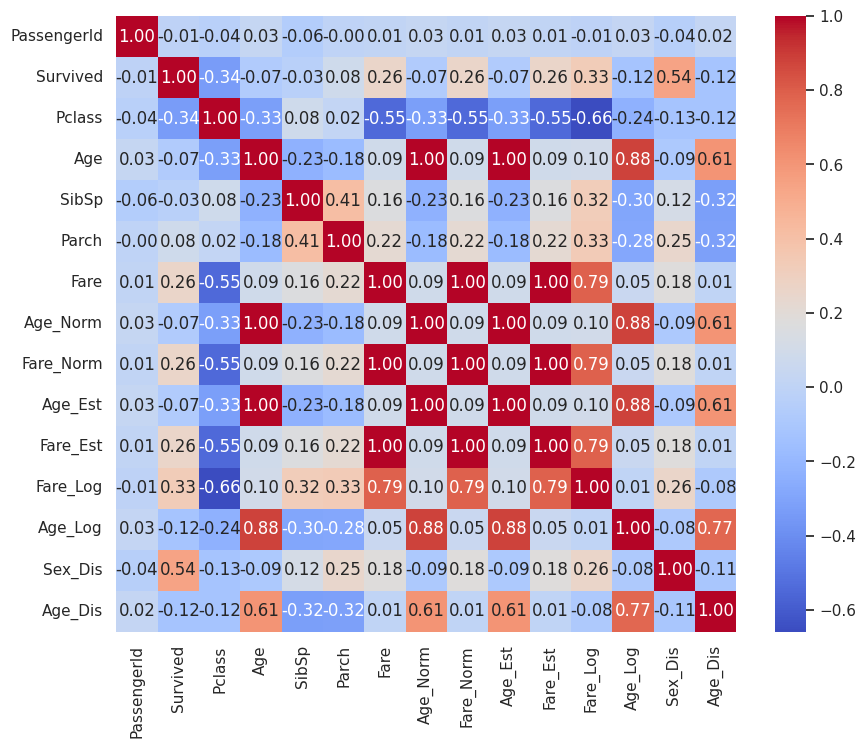

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado datos_titanic

# Calcular la matriz de correlación
correlation_matrix = datos_titanic.corr()

# Configurar el estilo de seaborn
sns.set(style="white")


# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el mapa de calor
plt.show()


In [46]:
datos_titanic_filter = datos_titanic.loc[:,["Sex_Dis","Pclass","Fare_Log","Survived"]]
datos_titanic_filter

,Sex_Dis,Pclass,Fare_Log,Survived
0,0,3,2.110213,0
1,1,1,4.280593,1
2,1,3,2.188856,1
3,1,1,3.990834,1
4,0,3,2.202765,0
...,...,...,...,...
886,0,2,2.639057,0
887,1,1,3.433987,1
888,1,3,3.196630,0
889,0,1,3.433987,1


**Conclusiones del método filter**:

Es importante recordar que los valores más cercanos a 1 o -1 indican una mayor fuerza de correlación, mientras que un valor de 0 indica nula correlación entre las variables.

Para obtener información mediante este método, debemos:

1. Identificar la variable de interés; en nuestro caso, la variable es "Survived".
2. Buscar las correlaciones más fuertes entre la variable de interés y las variables descriptoras.

   En nuestro caso, estas son:
   - "Sex_Dis" con 0.56
   - "Pclass" con -0.34
   - "Fare_log" con 0.33

3. Descartar las variables resultantes de transformaciones u operaciones de la variable con un valor alto de correlación. En nuestro caso:

   - "Sex_Dis" nos permitirá eliminar la variable "Sex".
   - "Fare_log" nos permitirá eliminar "Fare", "Fare_Norm", y "Fare_Est".

En este mismo paso, se podría considerar descartar las variables que están altamente correlacionadas con las variables anteriores. Esto nos permitirá eliminar redundancias y mejorar el rendimiento de las tareas de minería de datos.


**Métodos Embebidos:**

Los métodos embebidos incorporan la selección de características directamente en el proceso de construcción del modelo. Esto significa que las características se seleccionan durante el entrenamiento del modelo. Ejemplos de métodos embebidos son:

* Árboles de decisión / Random Forest: Algunos algoritmos basados en árboles eliminan características irrelevantes durante la construcción del árbol.

* LASSO (Least Absolute Shrinkage and Selection Operator): Agrega una penalización a la función de costo para forzar la dispersión de coeficientes, llevando a la selección automática de características. (Utilizado para tareas de regresión)



**Random Forest**

Para realizar la selección de características utilizando Random Forest en el DataFrame datos_titanic, puedes usar la biblioteca scikit-learn. Aquí te dejo un ejemplo:

1. Utiliza Random Forest para entrenar un modelo en el conjunto de entrenamiento.
2. Extrae la importancia de cada característica del modelo.
3. Crea un DataFrame ordenado por la importancia de las características.
Imprime la importancia de las características.
4. Utiliza SelectFromModel para seleccionar características con una importancia mayor que un umbral.
5. Imprime las características seleccionadas.


In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Supongamos que tienes un DataFrame llamado datos_titanic

# 1. Utiliza Random Forest para entrenar un modelo en el conjunto de entrenamiento.

# Eliminar columnas no deseadas o variables objetivo si es necesario:
# Para nuestro caso eliminar variables tipo string y 'Survived' es la variable objetivo:
X = datos_titanic.select_dtypes(exclude=['object']).drop('Survived', axis=1)
y = datos_titanic['Survived']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
rf_classifier.fit(X_train, y_train)

# 2. Extraer la importancia de las características
feature_importances = rf_classifier.feature_importances_

# 3. Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 4. Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 5. Imprimir el DataFrame con la importancia de las características
print("Importancia de las Características:")
print(feature_importance_df)

# 6. Utilizar SelectFromModel para seleccionar características con una importancia mayor que un umbral.
sfm = SelectFromModel(rf_classifier, threshold=0.05)
sfm.fit(X_train, y_train)

# 7. Transformar los conjuntos de entrenamiento y prueba
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# 8. Imprimir las características seleccionadas
print("\nCaracterísticas Seleccionadas:")
print(X.columns[sfm.get_support()])


Importancia de las Características:
        Feature  Importance
12      Sex_Dis    0.212570
0   PassengerId    0.117840
9      Fare_Est    0.088200
7     Fare_Norm    0.084650
5          Fare    0.080096
10     Fare_Log    0.074343
11      Age_Log    0.060756
6      Age_Norm    0.057924
8       Age_Est    0.056215
2           Age    0.054316
1        Pclass    0.051965
3         SibSp    0.035659
4         Parch    0.020013
13      Age_Dis    0.005455

Características Seleccionadas:
Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Age_Norm', 'Fare_Norm',
       'Age_Est', 'Fare_Est', 'Fare_Log', 'Age_Log', 'Sex_Dis'],
      dtype='object')


In [32]:
sfm.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [48]:
# Selecciona las columnas del DataFrame que coinciden con las características seleccionadas
datos_titanic_embebido = datos_titanic.loc[:, datos_titanic.columns.isin(X.columns[sfm.get_support()])]
datos_titanic_embebido.drop("PassengerId", axis=1)


,Pclass,Age,Fare,Age_Norm,Fare_Norm,Age_Est,Fare_Est,Fare_Log,Age_Log,Sex_Dis
0,3,22.000000,7.2500,0.271174,0.014151,-5.896199e-01,-0.500240,2.110213,3.135494,0
1,1,38.000000,71.2833,0.472229,0.139136,6.448480e-01,0.788947,4.280593,3.663562,1
2,3,26.000000,7.9250,0.321438,0.015469,-2.810029e-01,-0.486650,2.188856,3.295837,1
3,1,35.000000,53.1000,0.434531,0.103644,4.133853e-01,0.422861,3.990834,3.583519,1
4,3,35.000000,8.0500,0.434531,0.015713,4.133853e-01,-0.484133,2.202765,3.583519,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,0.334004,0.025374,-2.038487e-01,-0.384475,2.639057,3.332205,0
887,1,19.000000,30.0000,0.233476,0.058556,-8.210826e-01,-0.042213,3.433987,2.995732,1
888,3,29.642093,23.4500,0.367204,0.045771,-5.482138e-16,-0.174084,3.196630,3.422375,1
889,1,26.000000,30.0000,0.321438,0.058556,-2.810029e-01,-0.042213,3.433987,3.295837,0


**Coclusiones wrapper:**

* Importancia de las Características: La característica más importante es 'Sex_Dis' con una importancia de aproximadamente 21.26%.
'PassengerId' y 'Fare_Est' también tienen una importancia significativa, con alrededor del 11.78% y 8.82%, respectivamente.
Otras características como 'Age', 'Pclass', y 'Fare' también contribuyen a la importancia global. Sin embargo, debemos de darnos cuenta que un ID no debe ser una característica descriptible de ningún evento, por lo que se debe eliminar 'PassengerId' del dataframe final.

* Características Seleccionadas: Utilizando un umbral de importancia del 5%, las características seleccionadas incluyen 'PassengerId', 'Pclass', 'Age', 'Fare', 'Age_Norm', 'Fare_Norm', 'Age_Est', 'Fare_Est', 'Fare_Log', 'Age_Log', y 'Sex_Dis'.
Estas características han sido identificadas como las más relevantes para predecir la variable objetivo 'Survived' en el conjunto de datos.
Consideraciones Adicionales:


La importancia de las características se basa en la contribución al rendimiento del modelo Random Forest para predecir la supervivencia.
